<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Bayesian inference recap
- Sampling from posterior
- Marginal likelihood
- Model comparison

<hr/>

<h1><font color="darkblue">Bayesian Inference</font></h1>

Rev. Thomas Bayes (c.1701-1761)

<img src=https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif align=left height=200>


### Probabilitistic Models
- From data $D$ we infer the parameters $\theta$ of model $M$ 

>$\displaystyle p(\theta \lvert D,M) = \frac{p(\theta \lvert M)\ p(D \lvert \theta,M)}{p(D \lvert M)}$ 
><br><br>
> or
><br><br>
>$\displaystyle p(\theta) = \frac{\pi(\theta)\,{\cal{}L}(\theta)}{\int \pi(\theta)\,{\cal{}L}(\theta)\ d\theta }$

- Recall posterior, prior, likelihood, normalization

### Exercise: your 1st classification problem 

> Among some observed objects 1% belongs to a special type, e.g., quasars mixed with many stars. Using a classification method 99% of these special objects can be correctly selected. This method also selects 0.5% of the other types of objects erroneously.
><br><br>
> What is the probability of having a special type if an object is selected by the method?


#### Surprized?

> Similar analysis is needed every day...
><br>
> E.g., markers of diseases

### Likelihood Function
- A set of (conditionally) independent measurements

>$\displaystyle D = \Big\{x_i\Big\}_{i=1}^N$

- The likelihood function is a product 

>$\displaystyle {\cal L}_{\!D}(\theta) = p(D \lvert \theta) = p(\{x_i\} \lvert\,\theta) = \prod_{i=1}^N f(x_{i};\theta) = \prod_{i=1}^N \ell_{\!i}(\theta)$

- Maximum Likelihood Estimation (MLE) 

> E.g., Gaussians... cf. method of least squares

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = (4,3)

### Exercise: numerical intergration in 1D 

Implement Bayes' rule to infer a constant based on $N$ (independent) measurements

1. Assume Gaussian likelihood with $\sigma=1$ and improper prior
2. Use function `np.trapz(f,x)` for numerical integration
3. Start from the code below 

0.4590029568912548

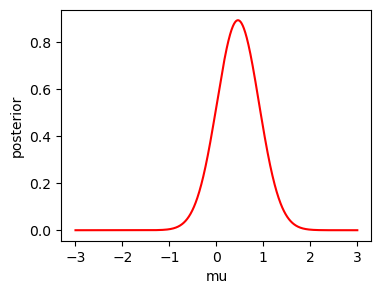

In [2]:
np.random.seed(42)
data = np.random.randn(5) # fake data points from normal distribution
mu = np.linspace(-3,3,1000) # grid over the parameter

lk = np.exp(-0.5*np.sum(np.square(data-mu[:,np.newaxis]),axis=1))
pdf = lk / np.trapz(lk,mu) # Bayes' rule with improper prior of 1

plt.plot(mu,pdf,'r'); plt.xlabel('mu'); plt.ylabel('posterior');
np.trapz(mu*pdf,mu) # expectation value

### More data

0.004946671408899374

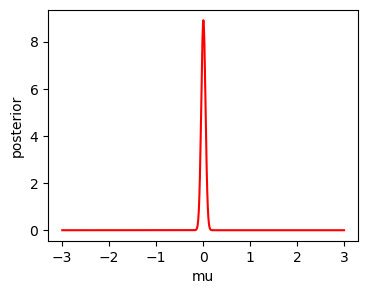

In [3]:
data = np.random.randn(500) # fake data points from normal distribution
mu = np.linspace(-3,3,1000) # grid over the parameter

lk = np.exp(-0.5*np.sum(np.square(data-mu[:,np.newaxis]),axis=1))
pdf = lk / np.trapz(lk,mu) # Bayes' rule with improper prior 1

plt.plot(mu,pdf,'r'); plt.xlabel('mu'); plt.ylabel('posterior');
np.trapz(mu*pdf,mu) # expectation value

### Another improper prior

Uniform but cannot be negative, e.g., temperature in Kelvin

> $\pi(\mu) = \begin{cases}        0 & \text{if } \mu < 0 \\         1 & \text{if } \mu \geq 0  \end{cases}$

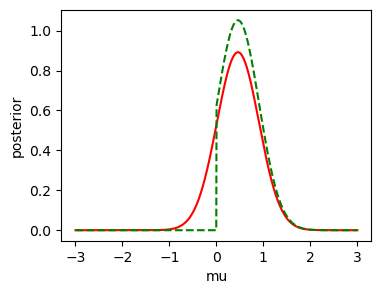

In [4]:
np.random.seed(42)
data = np.random.randn(5) # fake data points from normal distribution
mu = np.linspace(-3,3,1000) # grid over the parameter

lk = np.exp(-0.5*np.sum(np.square(data-mu[:,np.newaxis]),axis=1))
pdf = lk / np.trapz(lk,mu) # Bayes' rule with improper prior 1

prior = np.ones_like(lk)
prior[mu < 0] = 0

numerator = prior * lk
pdf0 = numerator / np.trapz(numerator,mu)

plt.plot(mu,pdf,'r')
plt.plot(mu,pdf0,'g--') 
plt.xlabel('mu'); plt.ylabel('posterior');

### Normal prior

Compare with previous results for different $\sigma$ values, i.e., `scale`

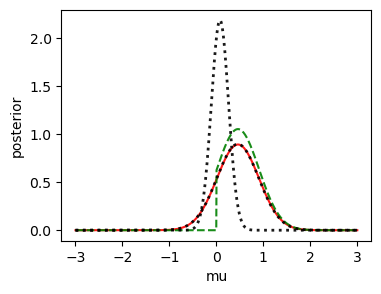

In [5]:
from scipy.stats import norm

plt.plot(mu,pdf, 'r', alpha=0.9)
plt.plot(mu,pdf0,'g--', alpha=0.9) 

for s in [5,0.2]:
    numerator = lk * norm(loc=0,scale=s).pdf(mu)
    pdfG = numerator / np.trapz(numerator, mu)
    plt.plot(mu, pdfG, 'k:', lw=2, alpha=0.9)
    
plt.xlabel('mu'); plt.ylabel('posterior');

### Multiple Datasets

- If the data set $D$ consists of two subsets of $D_1$ and $D_2$, we can consider them together or separately

>$\displaystyle p(\theta \lvert D_1,D_2) = \frac{p(\theta)\, p(D_1, D_2 \lvert \theta)}{p(D_1, D_2)}$
><br><br>
> also 
><br><br>
>$\displaystyle p(\theta \lvert D_1, D_2) = \frac{p(\theta \lvert D_1)\, p(D_2 \lvert \theta, D_1)}{p(D_2 \lvert D_1)}$

- Because

>$\displaystyle p(\theta \lvert D) = p(\theta \lvert \color{green}{D_1}, \color{red}{D_2}) = \frac{p(\theta \lvert \color{green}{D_1})\, p(\color{red}{D_2} \lvert \theta, \color{green}{D_1})}{p(\color{red}{D_2} \lvert \color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1} \lvert \theta)\, p(\color{red}{D_2} \lvert \theta, \color{green}{D_1})}{p(\color{green}{D_1})\,p(\color{red}{D_2} \lvert \color{green}{D_1})}$
>$\displaystyle = \frac{p(\theta)\,p(\color{green}{D_1},\color{red}{D_2} \lvert \theta)}{p(\color{green}{D_1}, \color{red}{D_2})}$
>$\displaystyle = \frac{p(\theta)\,p(D \lvert \theta)}{p(D)}$

- Incremental learning


>$\displaystyle D = \big\{ \color{green}{D_1},\ \color{red}{D_2},\ \color{darkblue}{D_3}, \dots, \color{black}{D_N} \big\}$

### Characterization of Posterior PDF

- Mode, Mean, Covariance, etc... For example,

>$ \displaystyle \bar{\theta} = \int {\color{default}\theta}\ p(\theta)\ d\theta$
>$ \displaystyle =  \frac{\int \theta\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$


- In general, numerical evaluation is required 

> Randomized algorithms;
> Sampling from distributions




### Caution!

- Noisy likelihood function with false peak(s)
 
> Misleading MLE by an erroneous spike?
 
- Mean could be completely off

> E.g., center of a ring 

### Sampling 

- How to calculate an integral such as

>$ \displaystyle \langle f(\theta)\rangle  =  \int f(\theta)\,p(\theta)\,d\theta $

- Approximation using $\{\theta_i\}$ sample from $p(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{1}{n}\sum_{i=1}^{n} f(\theta_i) $

- But we really don't know the posterior that well!

### Sampling from Prior

- Prior is better known 

> $ \displaystyle \langle f(\theta)\rangle =$
>$ \displaystyle \frac{\int f(\theta)\,\pi(\theta)\,{\cal{}L}(\theta)\,d\theta}{\int \pi(\theta)\,{\cal{}L}(\theta)\,d\theta }$


- Approximation using $\{\theta_i\}$ sample from $\pi(\cdot)$

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,{\cal{}L}(\theta_i)}{\sum {\cal{}L}(\theta_i)} $

### Sampling from ...

- E.g., likelihood?

>$ \displaystyle \langle f(\theta)\rangle \approx \frac{\sum f(\theta_i)\,\pi(\theta_i)}{\sum \pi(\theta_i)} $

- What about something "similar"?

### Importance Sampling

- We usually have integrals such as

>$ \displaystyle \langle f(\theta)\rangle = \int f(\theta)\,g(\theta)\,d\theta$

- If we can't sample from $g(\cdot)$ but can from a $h(\cdot)$ 

> s.t. $\ \ \ g(\theta) \leq K \cdot h(\theta) \ \ \ $ for any $\theta$ and a suitably large $K$
>
>$\displaystyle \langle f(\theta)\rangle \approx \frac{1}{n} \sum_i^n f(\theta_i)\,\frac{g(\theta_i)}{h(\theta_i)}$

### Unhomework

- Try different priors in the numerical inference example! 

> Does the result change? 
><br>
> How about with more or fewer measurements?

- Implement the example using different integration techniques

> Sample from prior density function or likelihood function to derive the expectation value and variance